In [87]:
import numpy as np
import pandas as pd
%matplotlib inline


import numpy as np

import pandas as pd
import numpy as np
import  seaborn as sns
import rwi as rwi
import math
import  seaborn as sns
from matplotlib import pyplot as plt
import hurst
import statsmodels.api as sm

In [4]:
import FinanceDataReader as fdr

In [569]:
btc = fdr.DataReader('BTC/USD', '2016-01-01')

C:\Users\lexik\.conda\envs\quant\lib\site-packages\FinanceDataReader\investing\data.py:58: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(jo['quotes'])


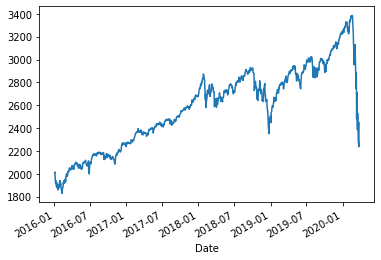

In [155]:
btc.Close.plot()

In [156]:
tmp = btc.copy()

In [157]:
btc.loc['2019-01-01':]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-02,2510.03,2476.96,2519.49,2467.47,0.0,0.0013
2019-01-03,2447.89,2491.92,2493.14,2443.96,0.0,-0.0248
2019-01-04,2531.94,2474.33,2538.07,2474.33,0.0,0.0343
2019-01-07,2549.69,2535.61,2566.16,2524.56,0.0,0.0070
2019-01-08,2574.41,2568.11,2579.82,2547.56,0.0,0.0097
...,...,...,...,...,...,...
2020-03-18,2398.10,2436.50,2453.57,2280.52,0.0,-0.0518
2020-03-19,2409.39,2393.48,2466.97,2319.78,0.0,0.0047
2020-03-20,2304.92,2431.94,2453.01,2295.56,0.0,-0.0434


In [159]:
rwi.hurst(btc[['Close']])

array([0.53203622])

In [943]:
result = []
for i in range(1, 200):
    result.append(momersionPeriod(btc.loc['2019-01-01':]['Close'], i))

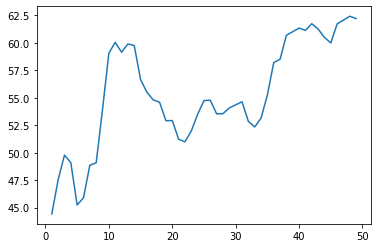

In [944]:
plt.plot([i for i in range(1,50)], result[:49])

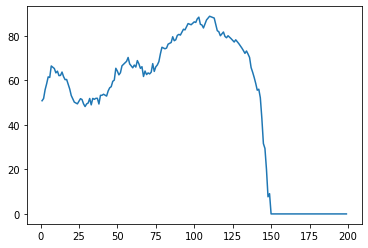

In [163]:
plt.plot([i for i in range(1,200)], result[:199])

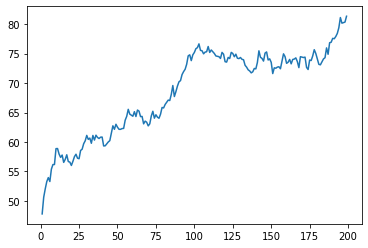

In [166]:
plt.plot([i for i in range(1,200)], result[:199])

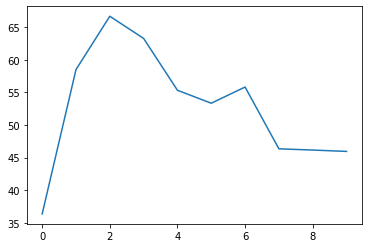

In [175]:
plt.plot(result[0:10])

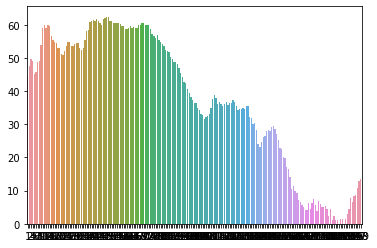

In [125]:
ax = sns.barplot(x=[i for i in range(1,200)], y=result, data=pd.Series(result[:200]))

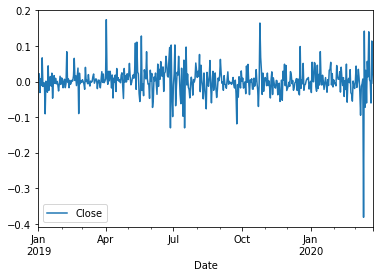

In [127]:
btc.loc['2019-01-01':][['Close']].pct_change().plot()

In [367]:
rwi.Momersion(btc.loc['2019-01-01':].Close.pct_change(1))

50.814332247557005

In [368]:
rwi.MomersionDouble(btc.loc['2019-01-01':].Close.pct_change(1))

52.295081967213115

In [352]:
result = []
for i in range(1, 500):
    val = rwi.autoCorrel(btc.loc['2016-01-01':].Close.pct_change(i).fillna(0), 5)
    result.append(val)
    

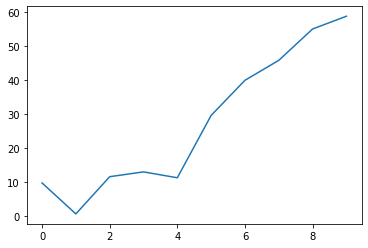

In [353]:
plt.plot(result[0:10])

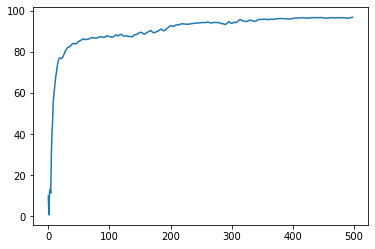

In [354]:
plt.plot(result)

In [77]:
p_ = 2
ts_ = btc.Close
ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
ts_2 = np.sign(ts_.pct_change(p_).shift(p_).fillna(0))

val = ts_1 * ts_2
pos = len(val[val == 1])
neg = len(val[val == -1])


mom = (pos/(pos+neg)) * 100.0

In [78]:
mom

49.70375246872943

In [183]:
def momersionPeriod(ts_, p_):
    ts_1 = np.sign(ts_.pct_change(p_).fillna(0))
    ts_2 = np.sign(ts_.pct_change(p_).shift(p_).fillna(0))
    
    val = ts_1 * ts_2
    pos = len(val[val == 1])
    neg = len(val[val == -1])
    if pos + neg == 0:
        return 0
   
    mom = (pos/(pos+neg)) * 100.0
    return mom

In [247]:
momersionPeriod(btc.loc['2016-01-01':]['Close'], 3)

52.03405865657521

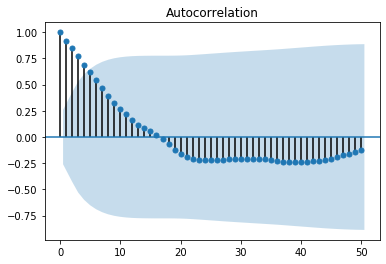

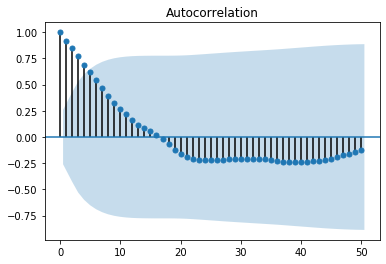

In [227]:
sm.graphics.tsa.plot_acf(pd.Series(btc.loc['2020-01-01':].Close).fillna(0).fillna(0), lags=50)

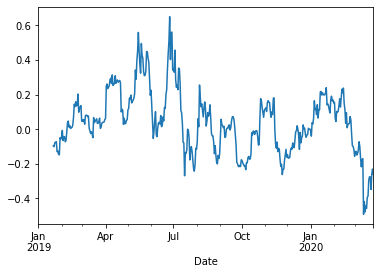

In [134]:
pd.Series(btc.loc['2019-01-01':].Close).pct_change(20).plot()

In [243]:
rwi.marketMeannes(btc.loc['2020-01-01':].Close.pct_change(50).fillna(0))

0.03571428571428571

In [355]:
### trading strategy

In [570]:
btc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-01,433.98,429.02,436.49,426.26,12970.0,0.0116
2016-01-02,432.70,433.98,435.79,430.00,6380.0,-0.0029
2016-01-03,428.66,432.70,433.07,422.00,19180.0,-0.0093
2016-01-04,432.90,428.64,435.67,426.97,13020.0,0.0099
2016-01-05,431.84,432.90,434.91,428.22,11220.0,-0.0024
...,...,...,...,...,...,...
2020-03-21,6201.80,6211.10,6461.00,5884.70,12940.0,-0.0006
2020-03-22,5827.05,6202.70,6410.60,5757.30,16280.0,-0.0604
2020-03-23,6491.20,5820.10,6652.40,5682.70,19550.0,0.1140


In [571]:
btc['returns'] = btc[['Close']].pct_change(1).fillna(0)
btc['returns2'] = btc[['Close']].pct_change(1).fillna(0).shift(1).fillna(0)
btc['entry'] = np.sign(btc['returns'] * btc.returns2)
btc['entry'] = btc['entry'].shift(1)
btc['res'] = np.sign(btc['returns'] * btc.returns2)

In [572]:
btc

,Close,Open,High,Low,Volume,Change,returns,returns2,entry,res
Date,,,,,,,,,,
2016-01-01,433.98,429.02,436.49,426.26,12970.0,0.0116,0.000000,0.000000,NaN,0.0
2016-01-02,432.70,433.98,435.79,430.00,6380.0,-0.0029,-0.002949,0.000000,0.0,0.0
2016-01-03,428.66,432.70,433.07,422.00,19180.0,-0.0093,-0.009337,-0.002949,0.0,1.0
2016-01-04,432.90,428.64,435.67,426.97,13020.0,0.0099,0.009891,-0.009337,1.0,-1.0
2016-01-05,431.84,432.90,434.91,428.22,11220.0,-0.0024,-0.002449,0.009891,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-21,6201.80,6211.10,6461.00,5884.70,12940.0,-0.0006,-0.000645,0.005248,1.0,-1.0
2020-03-22,5827.05,6202.70,6410.60,5757.30,16280.0,-0.0604,-0.060426,-0.000645,-1.0,1.0
2020-03-23,6491.20,5820.10,6652.40,5682.70,19550.0,0.1140,0.113977,-0.060426,1.0,-1.0


In [573]:
btc['val'] = btc.res.fillna(0) *  btc.returns

In [574]:
btc.loc['2016-01-01':'2019-01-01'].val.mean()

0.0026644313470229725

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


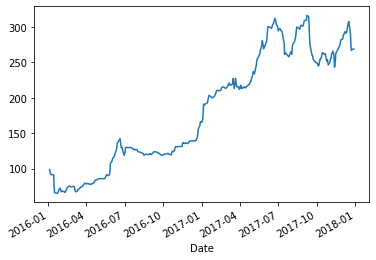

In [575]:
a = (100.0 +(100.0 * btc.loc['2016-01-01':'2018-01-01'][btc.entry==1].val).cumsum()).plot()

In [576]:
a.std()

AttributeError: 'AxesSubplot' object has no attribute 'std'

In [577]:
a.mean()

AttributeError: 'AxesSubplot' object has no attribute 'mean'

In [578]:
a[-1]

TypeError: 'AxesSubplot' object is not subscriptable

In [579]:
btc.loc['2016-01-01':'2018-01-01'].val.std()

0.04034883093618335

In [580]:
## optimize

In [592]:
btc

,Close,Open,High,Low,Volume,Change,returns,returns2,entry,res,val,shift_returns
Date,,,,,,,,,,,,
2016-01-01,433.98,429.02,436.49,426.26,12970.0,0.0116,0.000000,0.000000,NaN,0.0,0.000000,-0.002949
2016-01-02,432.70,433.98,435.79,430.00,6380.0,-0.0029,-0.002949,0.000000,0.0,0.0,-0.000000,-0.009337
2016-01-03,428.66,432.70,433.07,422.00,19180.0,-0.0093,-0.009337,-0.002949,0.0,1.0,-0.009337,0.009891
2016-01-04,432.90,428.64,435.67,426.97,13020.0,0.0099,0.009891,-0.009337,1.0,-1.0,-0.009891,-0.002449
2016-01-05,431.84,432.90,434.91,428.22,11220.0,-0.0024,-0.002449,0.009891,-1.0,-1.0,0.002449,-0.008915
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-21,6201.80,6211.10,6461.00,5884.70,12940.0,-0.0006,-0.000645,0.005248,1.0,-1.0,0.000645,-0.060426
2020-03-22,5827.05,6202.70,6410.60,5757.30,16280.0,-0.0604,-0.060426,-0.000645,-1.0,1.0,-0.060426,0.113977
2020-03-23,6491.20,5820.10,6652.40,5682.70,19550.0,0.1140,0.113977,-0.060426,1.0,-1.0,-0.113977,0.041718


In [1131]:
def optimize(ts, period):
    
    ts['returns'] = ts[['Close']].pct_change(period).fillna(0)
    ts['returns2'] = ts[['Close']].pct_change(period).fillna(0).shift(1).fillna(0)
    ts['shift_returns'] = ts.returns.shift(-1).fillna(0)
    ts['entry'] = np.sign(ts['returns'] * ts.returns2)
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns)
    ts['shift_Change'] = ts['Change'].shift(-1).fillna(0)
    ts['val'] = ts.shift_returns * ts.direction
    
    return ts #ts[(ts.entry==1) & (ts.val > 0) ].val.sum() / (ts[(ts.entry==1) & (ts.val < 0) ].val.abs().sum())  #.dropna()

In [1119]:
def optimize2(ts, period):
    
    ts['returns'] = ts[['Close']].pct_change(period).fillna(0)
    #ts['returns2'] = ts[['Close']].pct_change(period).fillna(0).shift(1).fillna(0)
    ts['shift_returns'] = ts.returns.shift(-1).fillna(0)  
    ts['entry'] = np.sign(ts['returns'])
    #ts['entry'] = ts['entry'].shift(1).fillna(0)
    ts['direction'] = np.sign(ts.returns)
    ts['shift_Change'] = ts['Change'].shift(-1).fillna(0)
    ts['val'] = ts.shift_Change * ts.direction 
    
    return ts #ts[(ts.entry==1) & (ts.val > 0) ].val.sum() / (ts[(ts.entry==1) & (ts.val < 0) ].val.abs().sum())  #.dropna()

In [1132]:
df = optimize(btc.loc['2016-01-01':][['Close', 'Change']], 10)

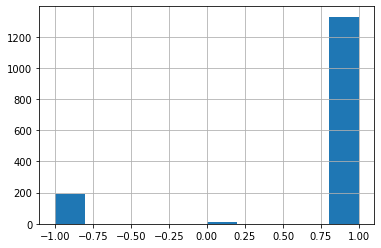

In [1140]:
df.entry.hist()

In [1114]:
result = []
for i in range(1, 50):
    val = optimize2(btc.loc['2020-01-01':][['Close', 'Change']], i)
    result.append((i, val))
    

In [1115]:
df = (pd.DataFrame(result)[1])

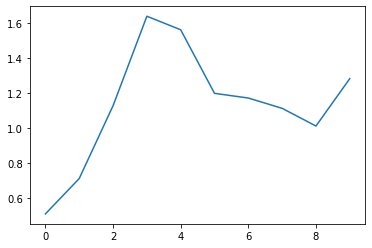

In [1116]:
df[0:10].plot()

In [1117]:
# 8 day momentum and 20 days

In [ ]:
# long term momentums are not random, they are auto-correlated
# momentum trading can work
# there are exit optimal periods

# next check gold and eurusd on daily
# check low tfs
# do accurate backtesting
# ML model with extra rwi indicators. 
# Vector backtesting
# accurate backtesting
# ML + filtering indicators
# MA strategy + filtering indicators


# clustering regimes
# ML model for each cluster regime


In [1198]:
# http://aaaquants.com/2017/08/18/quant-basics-2-vectorised-backtest/
# https://github.com/aaaquants/QuantBasics1-4/blob/master/basics.py
def calc_signals(tickers,p,a,b):
    sma = p.rolling(a).mean().fillna(0)
    smb = p.rolling(b).mean().fillna(0)
    signal = np.sign(sma - smb).diff()
    actual_signals = signal.dropna(how='all',axis=0)
    for col in actual_signals.columns:
        
        idx = actual_signals[col].first_valid_index()
        print(col, idx)
        signal[col][idx] = signal[col][idx]/2.
        
    return signal

In [1203]:
def calc_pnl(sig,p):
    sig_up = sig.cumsum().apply(lambda x:x*(x>0))
    sig_dwn = sig.cumsum().apply(lambda x:x*(x<0))
    pnlx = np.cumsum(p.diff()*sig_up+p.diff()*sig_dwn).sum(axis=1)
    return pnlx

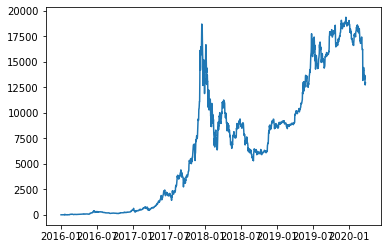

In [1226]:
plt.plot(np.cumsum(df[['Close']].diff() * sig_up+df[['Close']].diff()*sig_dwn))

In [1210]:
sig_up = signal.cumsum().apply(lambda x:x*(x>0))
sig_dwn = signal.cumsum().apply(lambda x:x*(x<0))

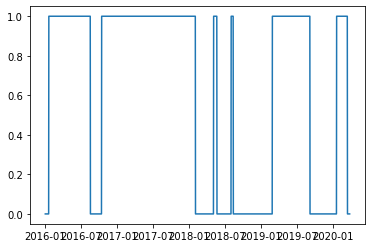

In [1207]:
plt.plot(signal.cumsum().apply(lambda x:x*(x>0)))

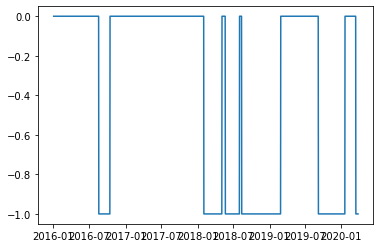

In [1208]:
plt.plot(signal.cumsum().apply(lambda x:x*(x<0)))

In [1199]:
signal = calc_signals('eur', df[['Close']], 20, 100)

Close 2016-01-02 00:00:00


In [1202]:
signal.loc['2016-01-02 00:00:00']['Close']

0.0

In [1151]:
sma = df.Close.rolling(20).mean().fillna(0)

In [1152]:
smb = df.Close.rolling(100).mean().fillna(0)

In [1146]:
sma-smb

Date
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
                ...    
2020-03-21   -1202.3230
2020-03-22   -1343.3145
2020-03-23   -1452.2135
2020-03-24   -1549.6355
2020-03-25   -1673.1035
Name: Close, Length: 1532, dtype: float64

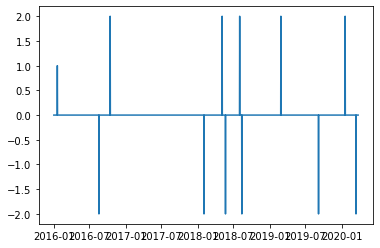

In [1161]:
plt.plot(np.sign(sma-smb).diff())

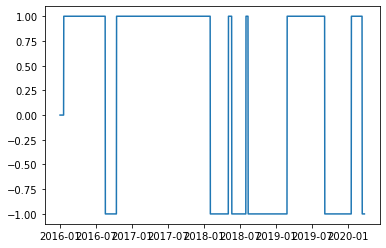

In [1162]:
plt.plot(np.sign(sma-smb))

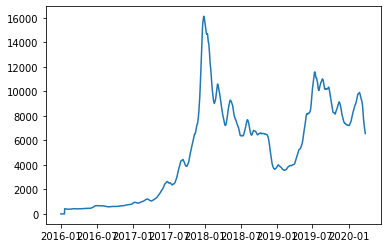

In [1157]:
plt.plot(sma)

In [1276]:
signal = np.sign(sma - smb).diff()
actual_signals = pd.DataFrame(signal).dropna(how='all',axis=0)

In [1289]:
test = df[['Close']]

In [1290]:
test['sma'] = test[['Close']].rolling(20).mean().fillna(0)
test['smb'] = test[['Close']].rolling(100).mean().fillna(0)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1291]:
test['signal'] = np.sign(test.sma-test.smb).diff().fillna(0)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


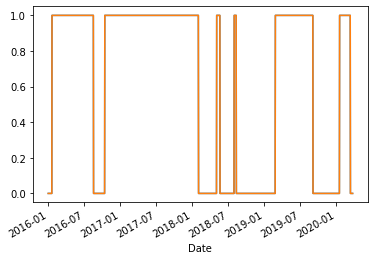

In [1359]:
(test.signal.cumsum()).apply(lambda x: x * (x > 0)).plot()
(test.signal.cumsum()).apply(lambda x: 1 if x > 0 else 0).plot()

In [1357]:
test

,Close,sma,smb,signal,sig_up,sig_dwn,diff,pnlx
Date,,,,,,,,
2016-01-01,433.98,0.0000,0.000,0.0,0.0,0.0,0.00,NaN
2016-01-02,432.70,0.0000,0.000,0.0,0.0,0.0,-1.28,0.00
2016-01-03,428.66,0.0000,0.000,0.0,0.0,0.0,-4.04,0.00
2016-01-04,432.90,0.0000,0.000,0.0,0.0,0.0,4.24,0.00
2016-01-05,431.84,0.0000,0.000,0.0,0.0,0.0,-1.06,0.00
...,...,...,...,...,...,...,...,...
2020-03-21,6201.80,7059.3790,8261.702,0.0,-0.0,-1.0,-4.00,13274.14
2020-03-22,5827.05,6903.8265,8247.141,0.0,-0.0,-1.0,-374.75,13648.89
2020-03-23,6491.20,6788.8315,8241.045,0.0,-0.0,-1.0,664.15,12984.74


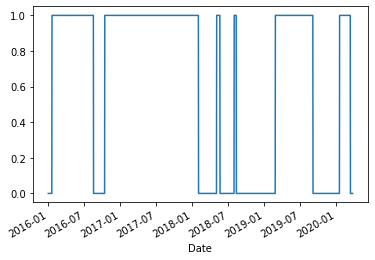

In [1352]:
test.sig_up.plot()

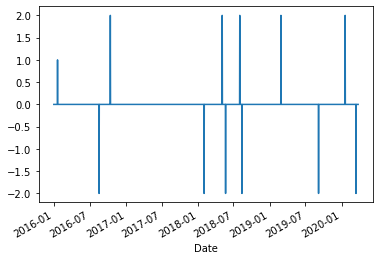

In [1293]:
test.signal.plot()

In [1298]:
sig_up = test.signal.cumsum().apply(lambda x:x*(x>0))

In [1299]:
sig_dwn = test.signal.cumsum().apply(lambda x:x*(x<0))

In [1307]:
test['sig_up'] = sig_up
test['sig_dwn'] = sig_dwn

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pnlx = np.cumsum(p.diff()*sig_up+p.diff()*sig_dwn).sum(axis=1)

In [1318]:
test['diff'] = test.Close.diff().fillna(0)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


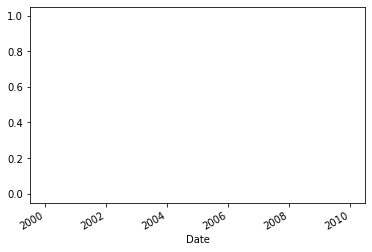

In [1327]:
(test[test.sig_up==1]['diff'].cumsum() + test[test.sig_dwn==1]['diff'].cumsum()).plot()

In [1328]:
test['pnlx'] = np.cumsum(test.Close.diff() * test.sig_up + test.Close.diff() * test.sig_dwn)

C:\Users\lexik\.conda\envs\quant\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


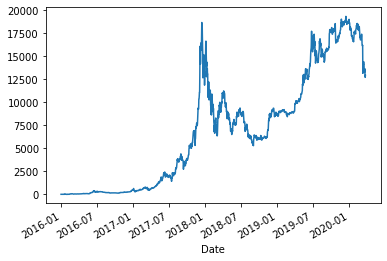

In [1346]:
test.pnlx.plot()

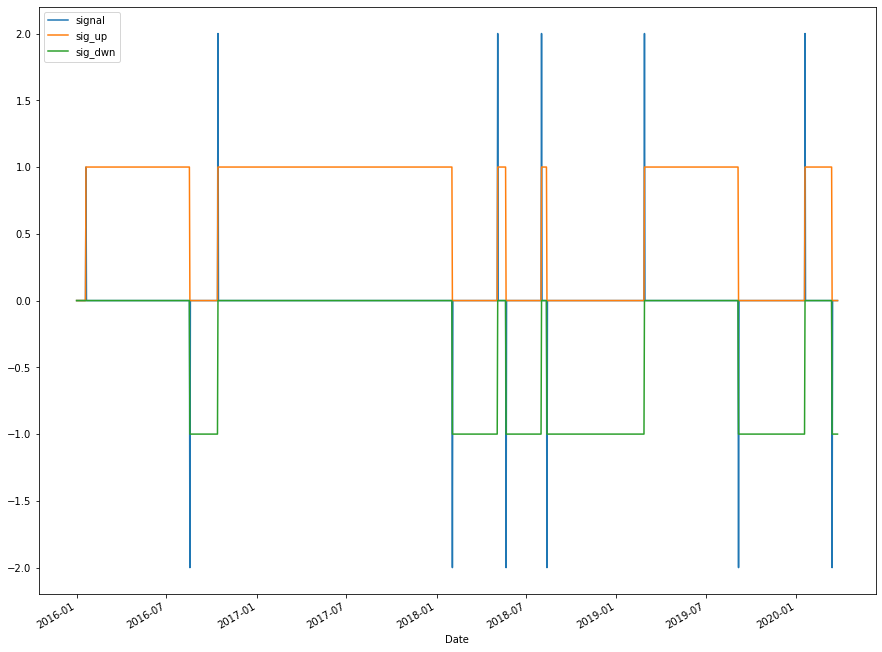

In [1314]:
test[['signal', 'sig_up', 'sig_dwn']].plot(figsize=(15,12))

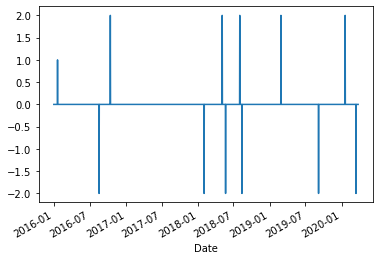

In [1296]:
test.signal.plot()

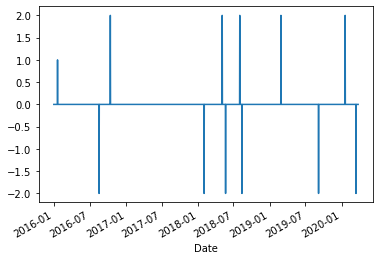

In [1281]:
test.signal.plot()

In [1360]:
test

,Close,sma,smb,signal,sig_up,sig_dwn,diff,pnlx
Date,,,,,,,,
2016-01-01,433.98,0.0000,0.000,0.0,0.0,0.0,0.00,NaN
2016-01-02,432.70,0.0000,0.000,0.0,0.0,0.0,-1.28,0.00
2016-01-03,428.66,0.0000,0.000,0.0,0.0,0.0,-4.04,0.00
2016-01-04,432.90,0.0000,0.000,0.0,0.0,0.0,4.24,0.00
2016-01-05,431.84,0.0000,0.000,0.0,0.0,0.0,-1.06,0.00
...,...,...,...,...,...,...,...,...
2020-03-21,6201.80,7059.3790,8261.702,0.0,-0.0,-1.0,-4.00,13274.14
2020-03-22,5827.05,6903.8265,8247.141,0.0,-0.0,-1.0,-374.75,13648.89
2020-03-23,6491.20,6788.8315,8241.045,0.0,-0.0,-1.0,664.15,12984.74
